# Face Mask Detection

Bu projemizde insanların maske takıp takmadıklarını bulan bir model gelişireceğiz.

<img src="https://istanbulalerjimerkezi.com.tr/wp-content/uploads/2021/02/Koronavirusten-Korunmak-Icin-Cocuklar-Maske-Takmali-Mi.jpg">

<a href="https://www.kaggle.com/datasets/vijaykumar1799/face-mask-detection">Dataya Buradan Erişebilirsiniz</a>

In [1]:
import cv2
import pandas as pd
import os

import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split

In [2]:
img_path="Dataset/"
labels=os.listdir("Dataset")

In [3]:
labels

['without_mask', 'with_mask']

In [4]:
#Dosyadan Resim okuma
img_list=[]
label_list=[]
for label in labels:
    for img_file in os.listdir(img_path+label):       #Klasörün içindeki alt klasörleri söyler
        img_list.append(img_path+label+"/"+img_file)  #apppend dizinin sonuna eklme yapıyor
        label_list.append(label)

In [5]:
df=pd.DataFrame({"img":img_list,"label":label_list})

In [6]:
df.head()

,img,label
0,Dataset/without_mask/1.png,without_mask
1,Dataset/without_mask/10.png,without_mask
2,Dataset/without_mask/100.png,without_mask
3,Dataset/without_mask/1000.png,without_mask
4,Dataset/without_mask/1001.png,without_mask


In [7]:
d={"with_mask":1,"without_mask":0}

In [8]:
df["encode_label"]=df["label"].map(d)

In [9]:
df.sample(5)

,img,label,encode_label
5086,Dataset/with_mask/2885.png,with_mask,1
2319,Dataset/without_mask/391.png,without_mask,0
94,Dataset/without_mask/1083.png,without_mask,0
4639,Dataset/with_mask/2482.png,with_mask,1
4242,Dataset/with_mask/2123.png,with_mask,1


In [10]:
def process_image(img):
        img=cv2.imread(img)
        img=cv2.resize(img,(128,128))
        img=img/255
        x.append(img)
        return img

In [11]:
x=[]
for img in df["img"]:
    process_image(img)    

In [12]:
x = np.array(x)

In [13]:
y=df["encode_label"]

In [14]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=42)

In [15]:
from keras.models import Sequential
from keras.layers import Conv2D,Dense,Flatten, Input, MaxPooling2D, Dropout, BatchNormalization, Reshape

In [16]:
model=Sequential()
model.add(Input(shape=(128,128,3)))
model.add(Conv2D(32,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.25)) # Burada 'rate' parametresini belirtiyoruz
model.add(Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(BatchNormalization())
model.add(Dense(128))
model.add(Dense(1, activation='sigmoid')) 
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [17]:
history=model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=15,verbose=1)

Epoch 1/15
150/150 ━━━━━━━━━━━━━━━━━━━━ 37s 207ms/step - accuracy: 0.8928 - loss: 4.7002 - val_accuracy: 0.5326 - val_loss: 3.6542
Epoch 2/15
150/150 ━━━━━━━━━━━━━━━━━━━━ 31s 204ms/step - accuracy: 0.9743 - loss: 0.4847 - val_accuracy: 0.5100 - val_loss: 9.8008
Epoch 3/15
150/150 ━━━━━━━━━━━━━━━━━━━━ 31s 204ms/step - accuracy: 0.9761 - loss: 0.1820 - val_accuracy: 0.7663 - val_loss: 0.7119
Epoch 4/15
150/150 ━━━━━━━━━━━━━━━━━━━━ 31s 205ms/step - accuracy: 0.9834 - loss: 0.0556 - val_accuracy: 0.9282 - val_loss: 0.2096
Epoch 5/15
150/150 ━━━━━━━━━━━━━━━━━━━━ 31s 205ms/step - accuracy: 0.9908 - loss: 0.0291 - val_accuracy: 0.9499 - val_loss: 0.1623
Epoch 6/15
150/150 ━━━━━━━━━━━━━━━━━━━━ 31s 204ms/step - accuracy: 0.9914 - loss: 0.0309 - val_accuracy: 0.9750 - val_loss: 0.0910
Epoch 7/15
150/150 ━━━━━━━━━━━━━━━━━━━━ 30s 202ms/step - accuracy: 0.9862 - loss: 0.0420 - val_accuracy: 0.9524 - val_loss: 0.1261
Epoch 8/15
150/150 ━━━━━━━━━━━━━━━━━━━━ 30s 203ms/step - accuracy: 0.9902 - loss: 0

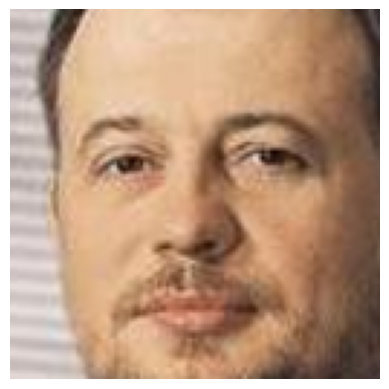

In [18]:
image_path = "Dataset/without_mask/258.png"  # Görüntü dosyasının yolu
img = cv2.imread(image_path)  # Görüntüyü yükleme
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # OpenCV, görüntüyü BGR formatında yükler; RGB'ye dönüştürelim
plt.imshow(img)# Görüntüyü gösterme
plt.axis('off')  # Eksenleri gizleme
plt.show()

In [19]:
def yb(img):
    img=cv2.imread(img)
    img=cv2.resize(img,(128,128))
    img=img/255
    img=np.expand_dims(img,axis=0)  # Modelin boyutunu arttırıyor
    return img

In [20]:
image=yb("Dataset/without_mask/258.png")

In [21]:
prediction=model.predict(image)
predicted_class=np.argmax(prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 260ms/step


In [22]:
predicted_class

0

In [23]:
# "with_mask":1,"without_mask":0

In [24]:
model.save("mask.h5")

### VGG16 ile

In [25]:
from keras.models import Sequential
from keras.layers import Conv2D,Dense,Flatten, Input, MaxPooling2D, Dropout, BatchNormalization, Reshape
from tensorflow.keras.applications import VGG16, ResNet50
from tensorflow.keras.preprocessing.image import ImageDataGenerator # Tek satırda resimlerin tamamını okumaya yarıyor

In [26]:
data_dir="Dataset"
img_width,img_height=128,128

train_datagen=ImageDataGenerator(rescale=1/255, validation_split=0.20)

train_datagenerator=train_datagen.flow_from_directory(directory=data_dir,target_size=(img_width,img_height),
                                class_mode="sparse", subset="training")

test_datagen=ImageDataGenerator( rescale=1/255)
test_datagenerator=train_datagen.flow_from_directory(directory=data_dir,target_size=(img_width,img_height),
                                class_mode="sparse", subset="validation")

base_model=VGG16(weights="imagenet", input_shape=(img_width,img_height,3),include_top=False)
model=Sequential()

model.add(base_model)
for layer in base_model.layers:
    layer.trainable=False

model.add(Flatten())
model.add(Dense(1024,activation="relu")) # Dense nöronları birbirine bağlar
model.add(Dense(1,activation="sigmoid"))

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

model.fit(train_datagenerator,epochs=10,validation_data=test_datagenerator)

Found 4792 images belonging to 2 classes.
Found 1196 images belonging to 2 classes.
Epoch 1/10


C:\Users\erkan\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


150/150 ━━━━━━━━━━━━━━━━━━━━ 167s 1s/step - accuracy: 0.9101 - loss: 0.4116 - val_accuracy: 0.9824 - val_loss: 0.0635
Epoch 2/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 163s 1s/step - accuracy: 0.9860 - loss: 0.0381 - val_accuracy: 0.9841 - val_loss: 0.0567
Epoch 3/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 162s 1s/step - accuracy: 0.9961 - loss: 0.0099 - val_accuracy: 0.9565 - val_loss: 0.1396
Epoch 4/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 165s 1s/step - accuracy: 0.9930 - loss: 0.0219 - val_accuracy: 0.9774 - val_loss: 0.0696
Epoch 5/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 164s 1s/step - accuracy: 0.9974 - loss: 0.0073 - val_accuracy: 0.9716 - val_loss: 0.0986
Epoch 6/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 162s 1s/step - accuracy: 0.9979 - loss: 0.0056 - val_accuracy: 0.9808 - val_loss: 0.0668
Epoch 7/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 162s 1s/step - accuracy: 0.9965 - loss: 0.0089 - val_accuracy: 0.9758 - val_loss: 0.0787
Epoch 8/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 162s 1s/step - accuracy: 0.9975 - loss: 0.0048 - val_accuracy: 0.977

In [27]:
model.save("mask_2.h5")

Sonuc olarak 98% CNN kullanarak 99% de VGG16 kullanarak Accuracy score elde ettik ve modellerimizi kaydettik.